In [5]:
import pandas as pd

# Load the dataset to understand its structure and content
file_path = 'Gym_membership.csv'
gym_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to get an overview
gym_data.head(), gym_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

(   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
 0   56    Male         88.3        1.71      180      157           60   
 1   46  Female         74.9        1.53      179      151           66   
 2   32  Female         68.1        1.66      167      122           54   
 3   25    Male         53.2        1.70      190      164           56   
 4   38    Male         46.1        1.79      188      158           68   
 
    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
 0                      1.69           1313.0         Yoga            12.6   
 1                      1.30            883.0         HIIT            33.9   
 2                      1.11            677.0       Cardio            33.4   
 3                      0.59            532.0     Strength            28.8   
 4                      0.64            556.0     Strength            29.2   
 
    Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \


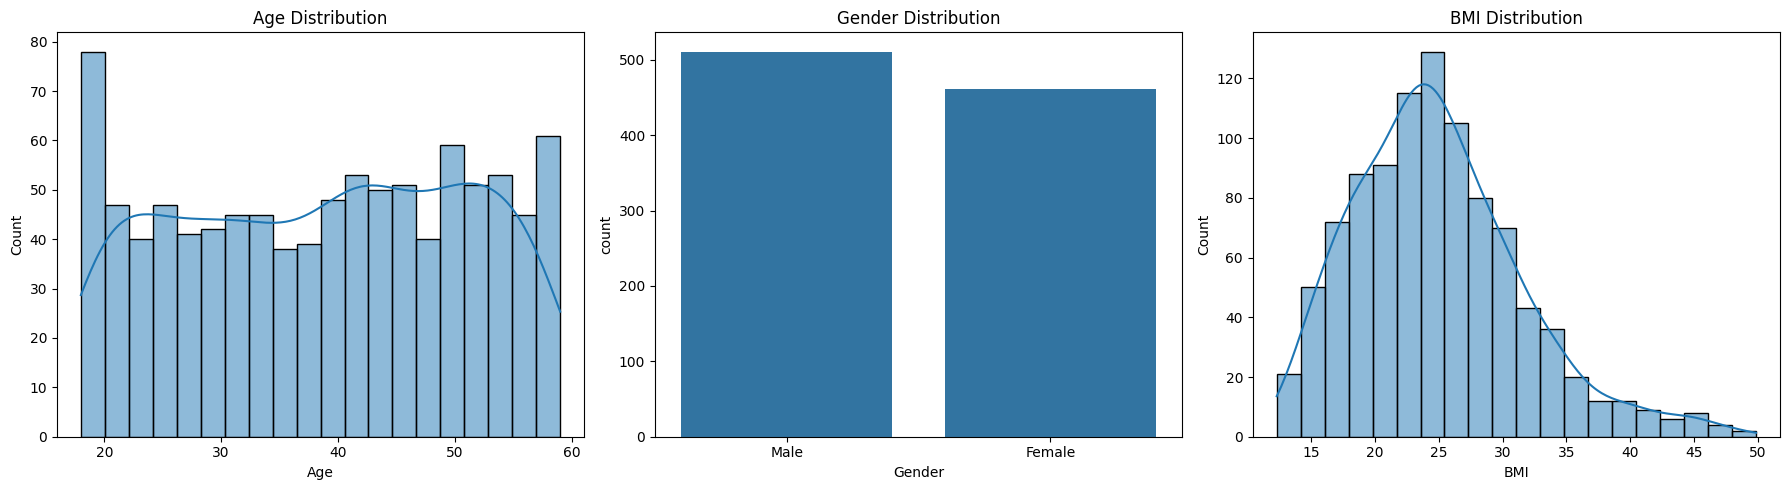

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing demographic distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(gym_data['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.countplot(x='Gender', data=gym_data, ax=axes[1])
axes[1].set_title('Gender Distribution')

sns.histplot(gym_data['BMI'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('BMI Distribution')

plt.tight_layout()
plt.show()


C:\Users\KillaEarth\AppData\Local\Temp\ipykernel_101852\71888816.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Beginner', 'Intermediate', 'Advanced'])


ValueError: Could not interpret value `Workout_Type` for `y`. Value is a string, but `data` was not passed.

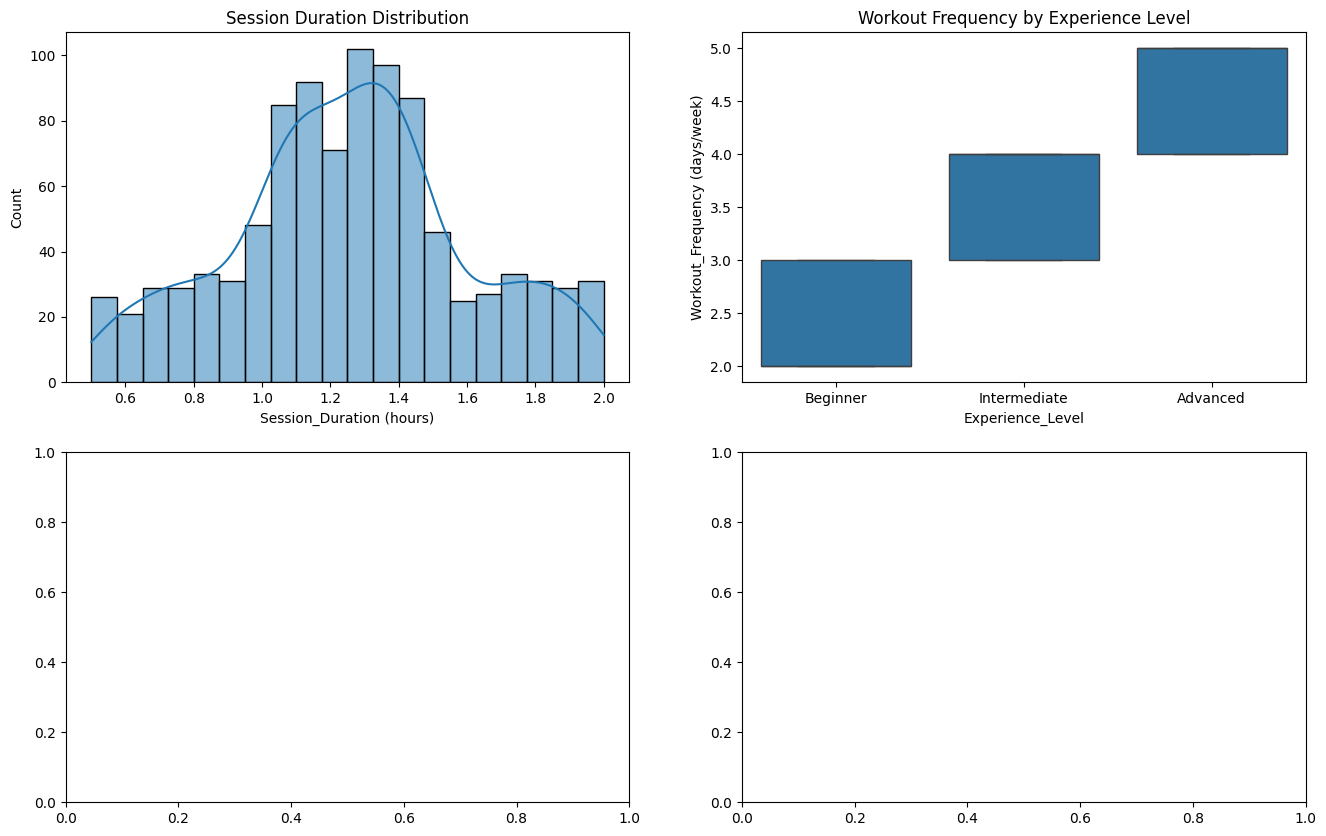

In [7]:
# Analyze workout preferences and patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution of session duration
sns.histplot(gym_data['Session_Duration (hours)'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Session Duration Distribution')

# Workout frequency by experience level
sns.boxplot(x='Experience_Level', y='Workout_Frequency (days/week)', data=gym_data, ax=axes[0, 1])
axes[0, 1].set_title('Workout Frequency by Experience Level')
axes[0, 1].set_xticklabels(['Beginner', 'Intermediate', 'Advanced'])

# Workout type distribution
sns.countplot(y='Workout_Type', order=gym_data['Workout_Type'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Workout Type Distribution')

# Calories burned vs. session duration
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', data=gym_data, ax=axes[1, 1])
axes[1, 1].set_title('Calories Burned vs. Session Duration')

plt.tight_layout()
plt.show()


C:\Users\KillaEarth\AppData\Local\Temp\ipykernel_101852\3287122264.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Beginner', 'Intermediate', 'Advanced'])


ValueError: Could not interpret value `Workout_Type` for `y`. Value is a string, but `data` was not passed.

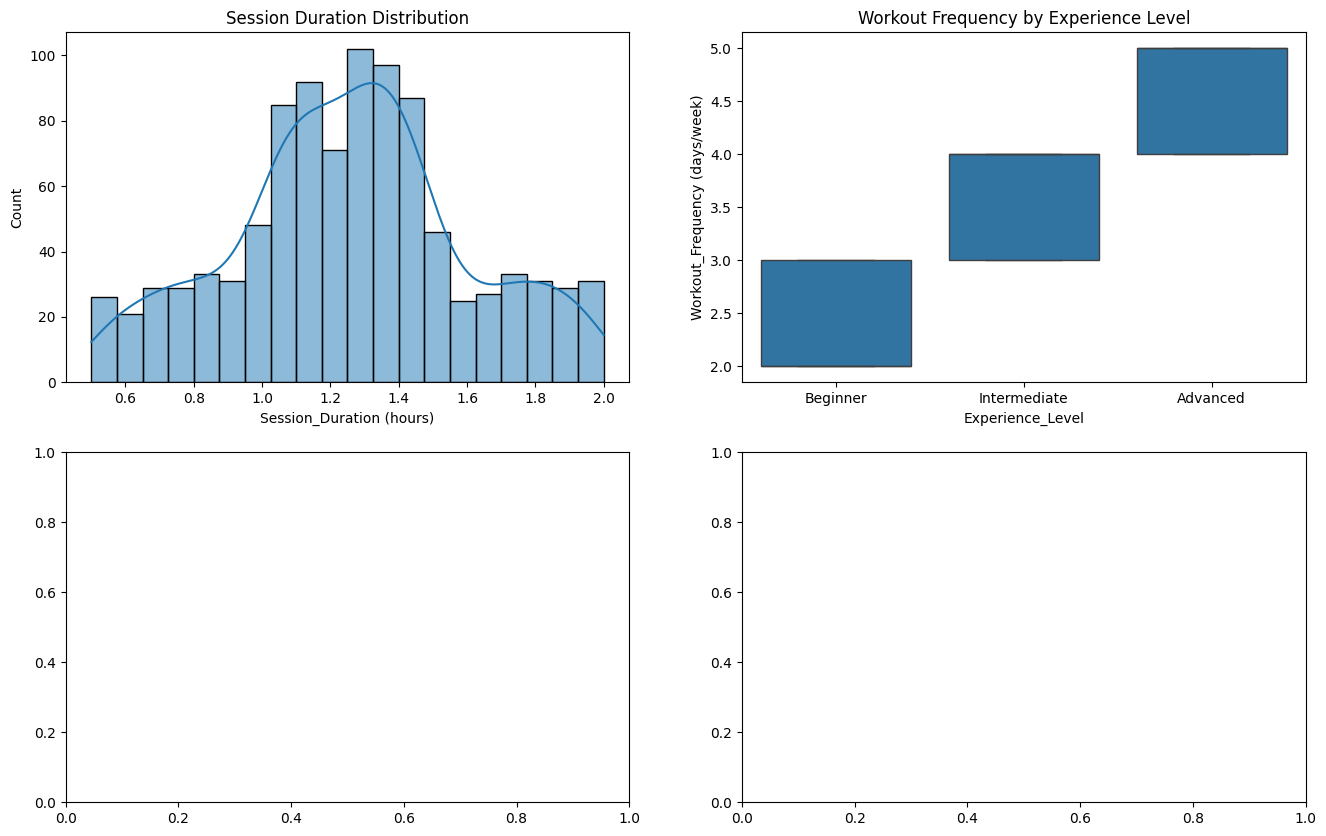

In [8]:
# Cleaning the Workout_Type column to ensure it is consistent
# 1. Remove leading/trailing spaces
# 2. Replace any null or missing values with "Unknown"
# 3. Convert all workout types to lowercase for consistency

# Clean and standardize the Workout_Type column
gym_data['Workout_Type'] = gym_data['Workout_Type'].str.strip().fillna('Unknown').str.lower()

# Plot the distribution of workout preferences and relationship between session duration and calories burned
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution of session duration
sns.histplot(gym_data['Session_Duration (hours)'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Session Duration Distribution')

# Workout frequency by experience level
sns.boxplot(x='Experience_Level', y='Workout_Frequency (days/week)', data=gym_data, ax=axes[0, 1])
axes[0, 1].set_title('Workout Frequency by Experience Level')
axes[0, 1].set_xticklabels(['Beginner', 'Intermediate', 'Advanced'])

# Workout type distribution
sns.countplot(y='Workout_Type', order=gym_data['Workout_Type'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Workout Type Distribution')

# Calories burned vs. session duration, color by workout type
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', data=gym_data, ax=axes[1, 1])
axes[1, 1].set_title('Calories Burned vs. Session Duration')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
